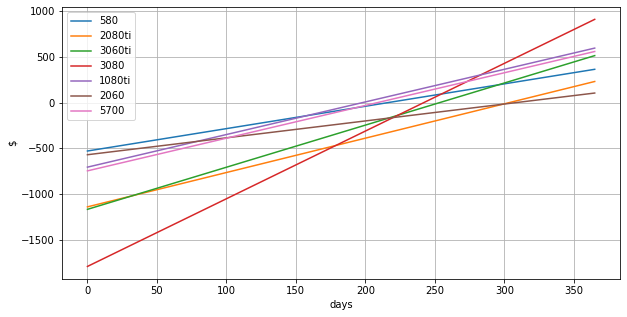

In [18]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline

"""
If you want this notebook to be accurate, find the current pricecs of the GPU's 
and the current profittability rates. And update/add the current variables.
Values are valid for 2/26/2021, change daily manually. ETH is volatile so you should.
"""

#AED/USD conversion, use if you want
usd = lambda x: x/3.68
aed = lambda x: x*3.68

fixed_cost = -(400/3.68)*1.5 # +50% to account for extras, for eg PCIE splitters.

#cash in hand plots
def cashplot(gpu_daily_profit,gpu_cost,n):
    
    #n = no of GPU's
    if n == 1:
        gpu_cost = gpu_cost
        gpu_daily_profit = gpu_daily_profit
    else:
        gpu_cost = (gpu_cost*n)-(fixed_cost*(n-1))
        gpu_daily_profit = gpu_daily_profit*n
    
    
    cashsum_gpu = 0
    gpu_profit = [gpu_daily_profit for i in range(1,366)]
    gpu_cash = np.append([gpu_cost],gpu_profit)
    
    summed_list = []
    for v in gpu_cash:
        cashsum_gpu += v
        summed_list.append(cashsum_gpu)
        
    return summed_list

profit = lambda x: x[-1] #end of year profit, pass summed list as arguments

def breakeven(gpu_cost,gpu_daily_profit): #no of days to breakeven
    if gpu_cost >= 0:
        gpu_cost = gpu_cost
    else:
        gpu_cost = -gpu_cost
    return gpu_cost//gpu_daily_profit


#gpu cost

RX580_original_cost = -1350/3.68 + fixed_cost
og_price_3080 = -usd(6000) +fixed_cost
cost_2080ti = -3600/3.68 + fixed_cost
cost_3060ti = -3700/3.68 + fixed_cost
gtx1080ti = -2000/3.68 + fixed_cost
rtx_2060 = -usd(1500) + fixed_cost
rx5700 = -usd(2150) + fixed_cost

#gpu_daily_profit
#profit per day, assuming constant rate of return, otherwise multiply with sum of probabilities
# Also profits are pulled from whattomine.com and powerconsumption is factored into the value, at UAE prices

RX580_day_profit = 2.45
daily_profit_3080 = 7.41
daily_profit_2080ti = 3.76
daily_profit_3060ti = 4.61
gtx1080ti_profit = 3.57
rtx_2060_daily_profit = 1.85
rx5700_daily_profit = 3.58

#GPU's cash in hand lists
summedlist_580 = cashplot(RX580_day_profit,RX580_original_cost,1)

summedlist_3080 = cashplot(daily_profit_3080,og_price_3080,1)

summedlist_2080ti = cashplot(daily_profit_2080ti,cost_2080ti,1)

summedlist_3060ti = cashplot(daily_profit_3060ti,cost_3060ti,1)

summedlist_1080ti = cashplot(gtx1080ti_profit,gtx1080ti,1)

summedlist_2060 = cashplot(rtx_2060_daily_profit,rtx_2060,1)

summedlist_5700 = cashplot(rx5700_daily_profit,rx5700,1)
#plot
days = range(0,366)
plt.rcParams['figure.figsize'] = [10, 5] 
plt.plot(days, summedlist_580, label='580')
plt.plot(days, summedlist_2080ti, label='2080ti')
plt.plot(days, summedlist_3060ti, label='3060ti')
plt.plot(days, summedlist_3080, label='3080')
plt.plot(days, summedlist_1080ti, label='1080ti')
plt.plot(days, summedlist_2060, label='2060')
plt.plot(days, summedlist_5700, label='5700')
plt.ylabel('$')
plt.xlabel('days')
plt.legend()
plt.grid()
plt.show()



In [20]:
#Df

gpu_list = ['580','3080','2080ti','3060ti','1080ti','2060','5700']
daily_profit_list = [2.45, 7.41,3.76,4.61,3.57,1.85,3.58]
cost_list = [-RX580_original_cost, -og_price_3080,-cost_2080ti,-cost_3060ti,-gtx1080ti,-rtx_2060,-rx5700]
annual_profit_list = [profit(summedlist_580),profit(summedlist_3080),profit(summedlist_2080ti),
                      profit(summedlist_3060ti),profit(summedlist_1080ti),profit(summedlist_2060),
                     profit(summedlist_5700)]

d = {'GPU': gpu_list,
     'daily_profit': daily_profit_list,
     'cost': cost_list,
    'value' : [cost/profit for profit,cost in zip(daily_profit_list,cost_list)]}
     

df = pd.DataFrame(data=d)

In [15]:
df

,GPU,daily_profit,cost,value
0,580,2.45,529.891304,216.282165
1,3080,7.41,1793.478261,242.034853
2,2080ti,3.76,1141.304348,303.538390
3,3060ti,4.61,1168.478261,253.466000
4,1080ti,3.57,706.521739,197.905249
5,2060,1.85,570.652174,308.460635
6,5700,3.58,584.239130,163.195288


In [23]:
def investment(gpu_annual_profit,rateofreturn):
    """
    Will return the amount of usd you would have needed to invest to get equivalent profits
    Pass profit(summedlist_gpuname) as gpu_annual_profit
    And pass the real rate of return on your investment in %
    """
    return (gpu_annual_profit)/(rateofreturn/100)

print(investment(profit(summedlist_5700),7)) #As you can see a 5700 will return equivalent to ~8000 USD in ETF's.

7991.677018633563
